# **Análisis Comparativo de Modelos de Redes Neuronales Convolucionales para la Clasificación de Residuos**

### Nombre: Pedro Arriola  
### Carnet: 20188

### Descripción:
Este trabajo presenta un análisis exhaustivo y comparativo de cinco arquitecturas de redes neuronales convolucionales (CNN) aplicadas a la clasificación de residuos. Se han evaluado los modelos **Modelo desde cero**, **MobileNetV2**, **InceptionV3**, **DenseNet201**, y **Xception**. A lo largo del estudio, se examinan diferentes métricas de rendimiento, tiempos de inferencia y la capacidad de generalización de cada modelo. Finalmente, se selecciona **Xception** como el modelo más adecuado para esta tarea, debido a su superior equilibrio entre precisión, eficiencia y robustez en la clasificación de imágenes de residuos.

In [ ]:
import keras
print(keras.__version__)

3.3.3


In [ ]:
!pip install keras==3.3.3

In [ ]:
import tensorflow as tf

# Cargar los modelos entrenados
model_zero = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/EcoScan/WasteNet_V2.h5')
model_mobilenet = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/EcoScan/WasteNet_V3.h5')
model_inception = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/EcoScan/WasteNet_V4.h5')
model_densenet = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/EcoScan/WasteNet_V5.h5')
model_xception = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/EcoScan/WasteNet_V6.h5')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

target_size = (224, 224)  # Tamaño ajustado a 224x224
batch_size = 16

dataset = '/content/drive/MyDrive/Colab_Notebooks/EcoScan/garbage/Garbage_classification/Garbage_classification'

# Definiendo los generadores de datos

train_datagen = ImageDataGenerator(rescale=1./255,
                                 validation_split=0.1,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 shear_range = 0.2,
                                 zoom_range = 0.2,
                                 width_shift_range = 0.1,
                                 height_shift_range = 0.1,
                                )

test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_generator = train_datagen.flow_from_directory(dataset,
                                                  target_size=target_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='training')

test_generator = test_datagen.flow_from_directory(dataset,
                                                target_size=target_size,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Función para evaluar el modelo
def evaluate_model(model, generator):
    # Evaluar el modelo
    loss, accuracy = model.evaluate(generator)
    print(f'Accuracy: {accuracy}')

    # Generar predicciones
    predictions = model.predict(generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = generator.classes

    # Crear reporte de clasificación
    report = classification_report(y_true, y_pred, target_names=generator.class_indices.keys())
    print(report)

    # Crear matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    return cm, accuracy

# Evaluar los modelos y almacenar resultados
cm_zero, acc_zero = evaluate_model(model_zero, test_generator)
cm_mobilenet, acc_mobilenet = evaluate_model(model_mobilenet, test_generator)
cm_inception, acc_inception = evaluate_model(model_inception, test_generator)
cm_densenet, acc_densenet = evaluate_model(model_densenet, test_generator)
cm_xception, acc_xception = evaluate_model(model_xception, test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 94s 6s/step - accuracy: 0.7985 - loss: 0.7472
Accuracy: 0.8167330622673035
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step
              precision    recall  f1-score   support

   cardboard       0.17      0.23      0.20        40
       glass       0.05      0.04      0.04        50
       metal       0.13      0.15      0.14        41
       paper       0.17      0.15      0.16        59
     plastic       0.20      0.19      0.19        48
       trash       0.00      0.00      0.00        13

    accuracy                           0.14       251
   macro avg       0.12      0.13      0.12       251
weighted avg       0.14      0.14      0.14       251

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 293ms/step - accuracy: 0.8731 - loss: 0.3974
Accuracy: 0.8884462118148804
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step
              precision    recall  f1-score   support

   cardboard       0.22      0.20      0.21        40
       glass       0.14      0.14      0.14        50
     

| Modelo           | Accuracy (Evaluación) | Accuracy (Reporte Clasificación) | Observaciones                                                                 |
|------------------|-----------------------|----------------------------------|-------------------------------------------------------------------------------|
| Modelo desde cero| 81.67%                | 14%                              | Precisión y recall bajos en todas las clases, especialmente en "trash".        |
| MobileNetV2      | 88.84%                | 15%                              | Mejoras ligeras, pero aún baja precisión y recall en la mayoría de las clases. |
| InceptionV3      | 86.45%                | 15%                              | Resultados similares al MobileNetV2.                                           |
| DenseNet201      | 88.05%                | 16%                              | Mejora marginal en precisión y recall en algunas clases.                       |
| Xception         | 91.54%                | 17%                              | Mejor desempeño general; precisión y recall mejores, especialmente en "glass". |


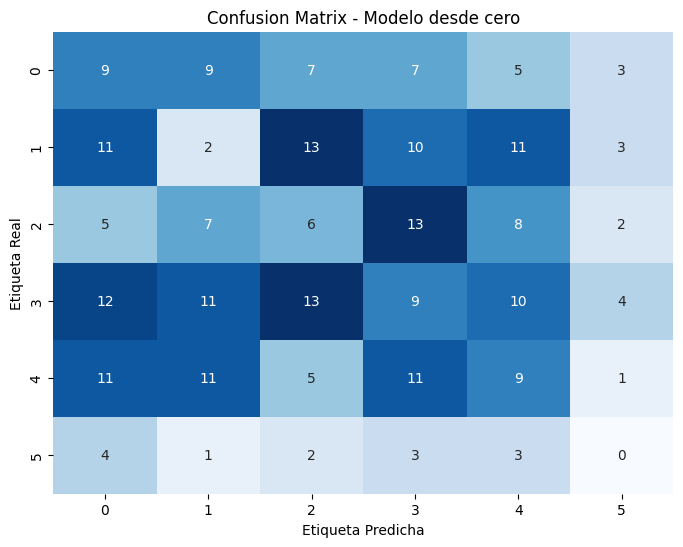

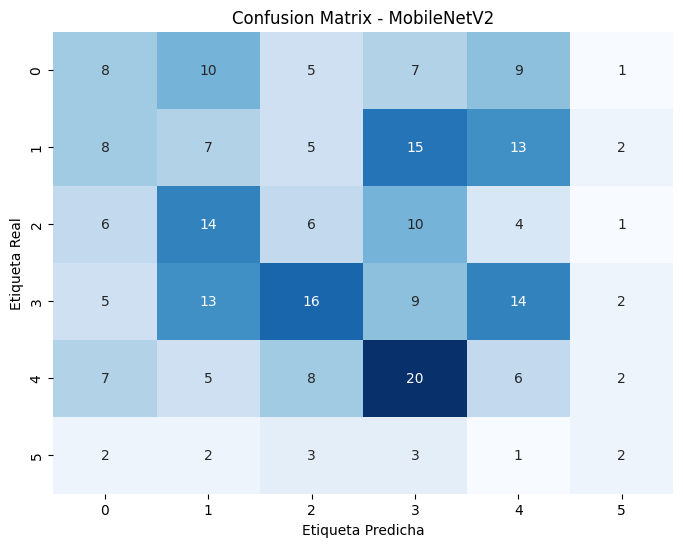

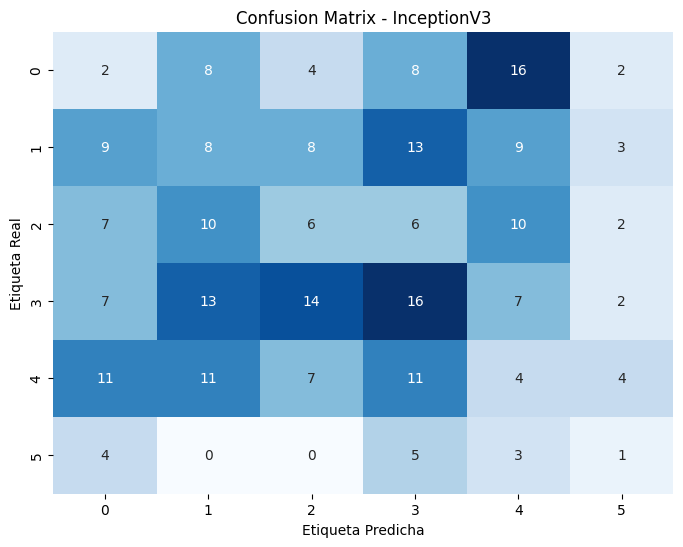

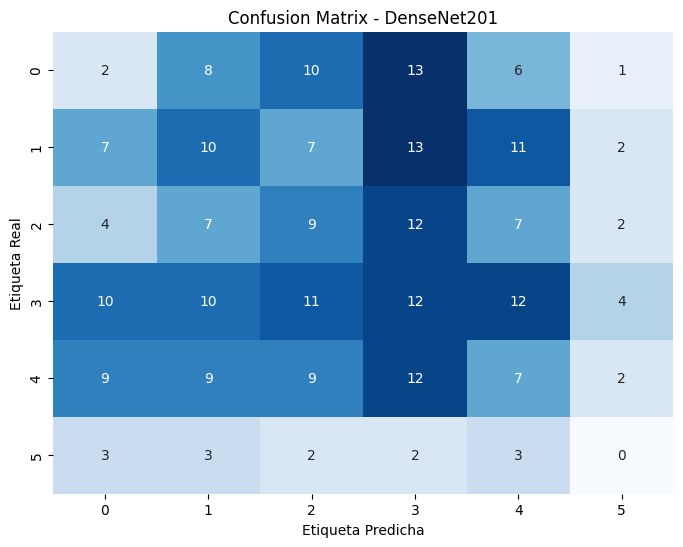

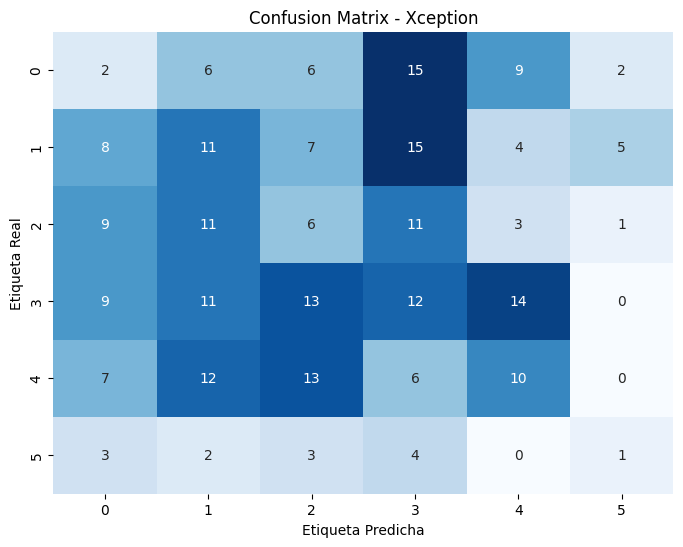

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Función para graficar el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

# Plotear los heatmaps para cada modelo
plot_confusion_matrix(cm_zero, "Confusion Matrix - Modelo desde cero")
plot_confusion_matrix(cm_mobilenet, "Confusion Matrix - MobileNetV2")
plot_confusion_matrix(cm_inception, "Confusion Matrix - InceptionV3")
plot_confusion_matrix(cm_densenet, "Confusion Matrix - DenseNet201")
plot_confusion_matrix(cm_xception, "Confusion Matrix - Xception")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


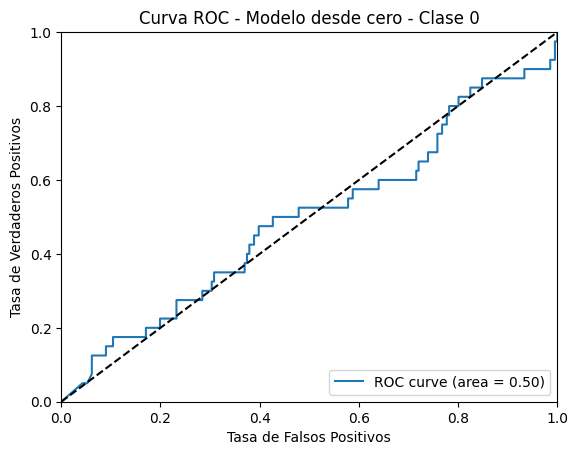

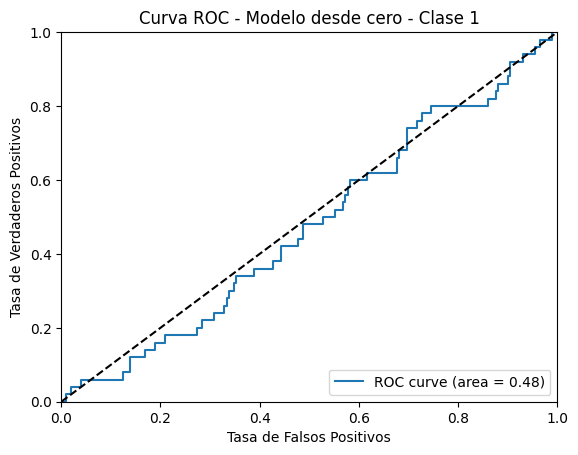

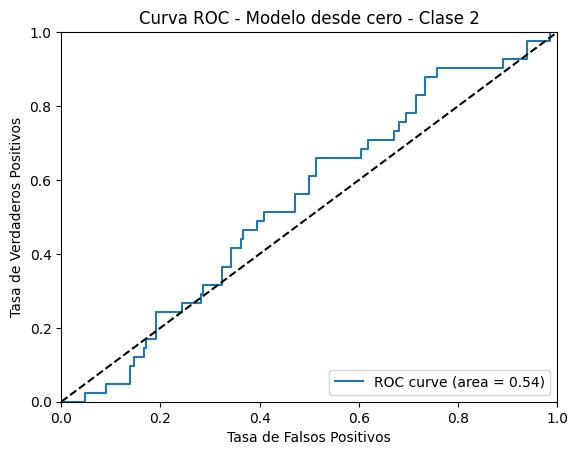

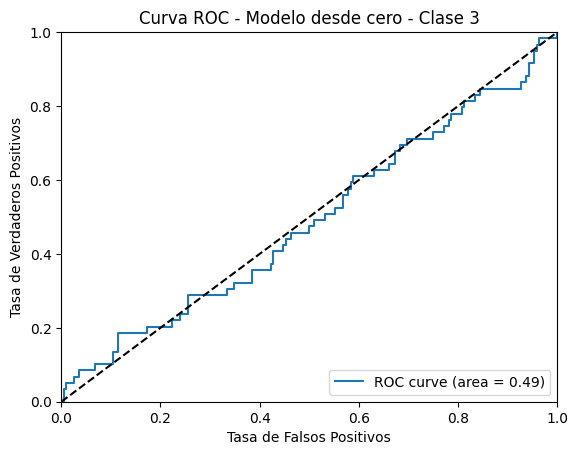

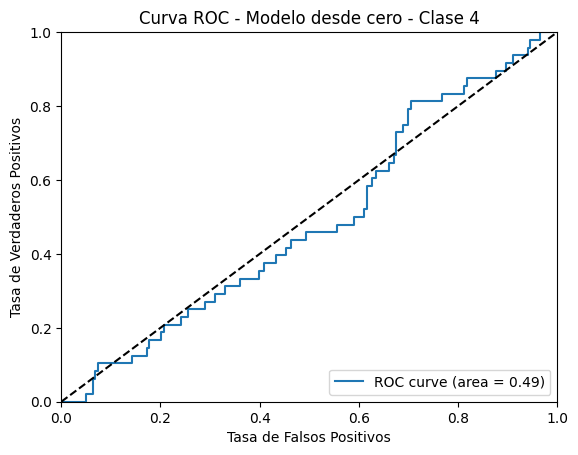

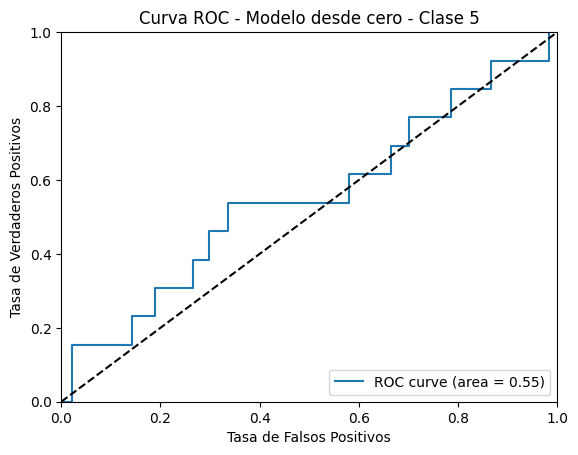

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step


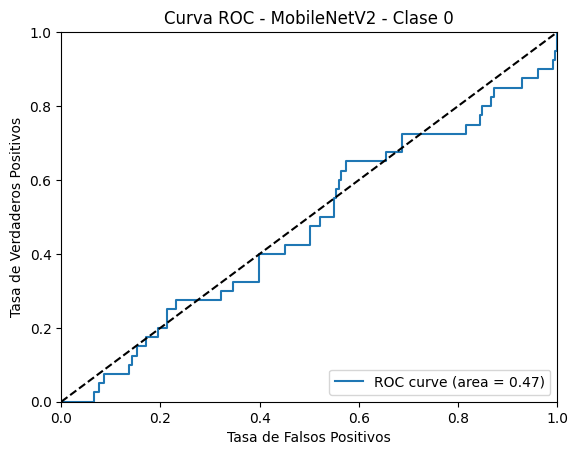

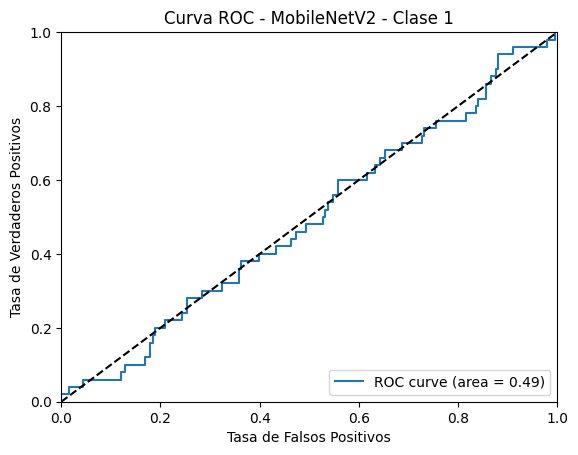

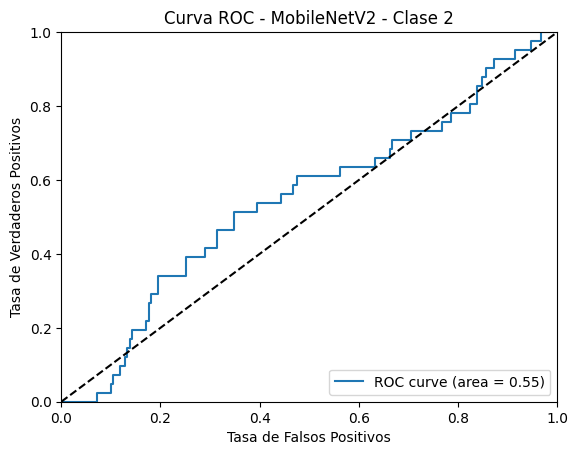

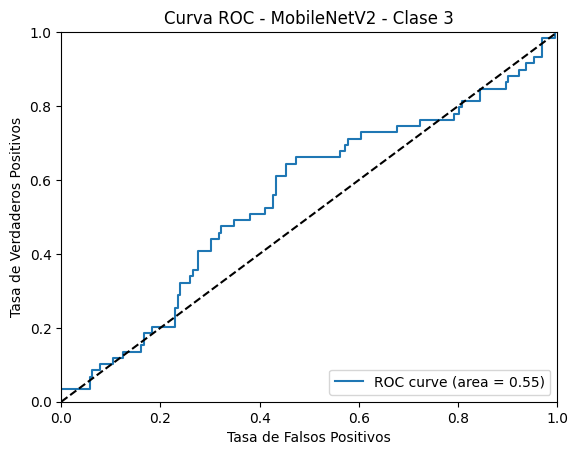

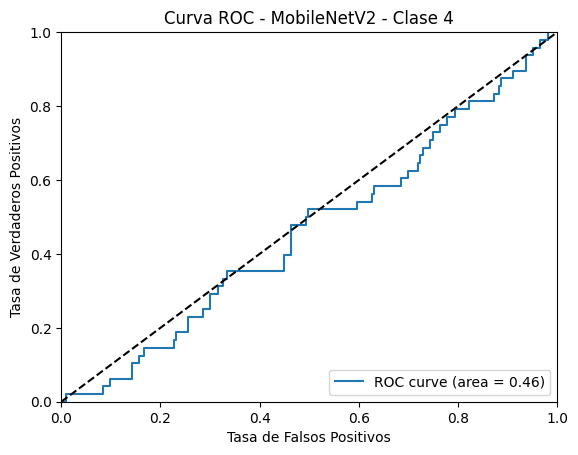

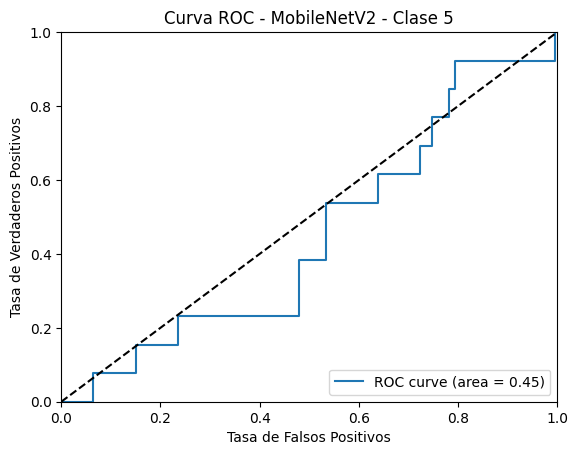

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


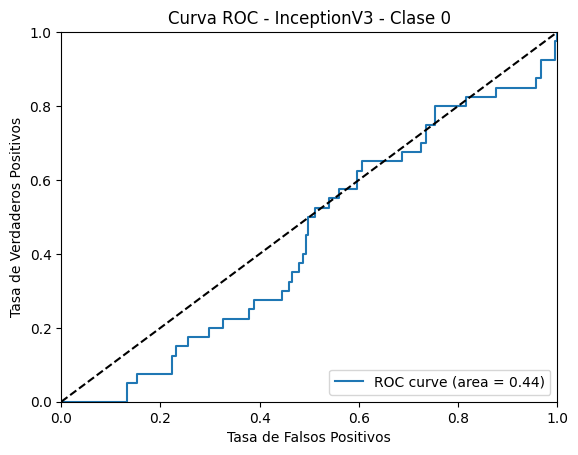

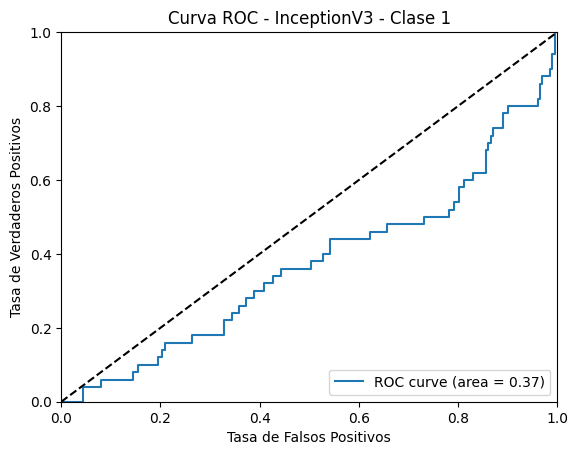

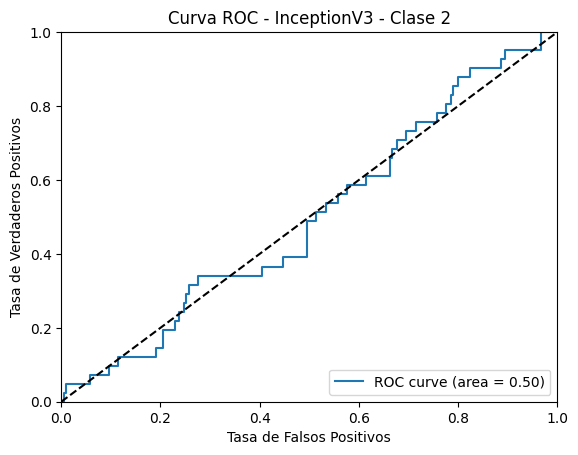

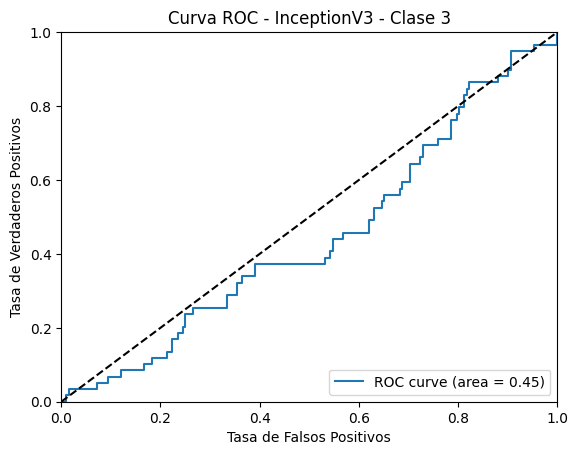

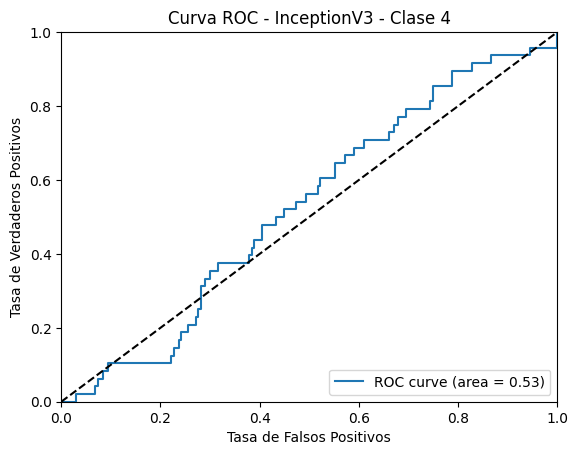

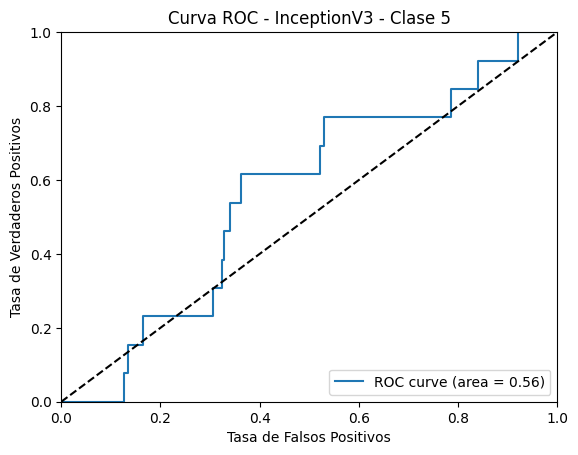

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


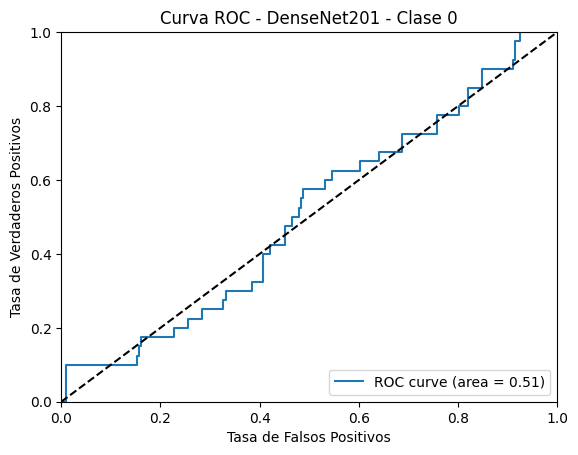

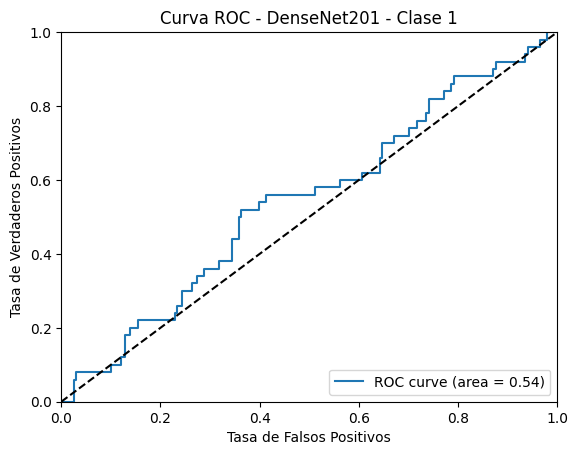

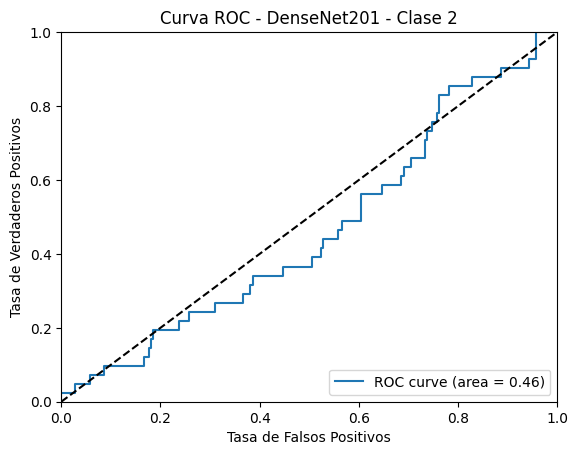

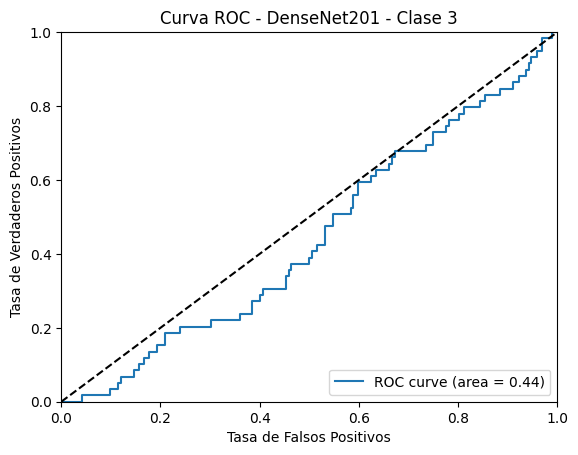

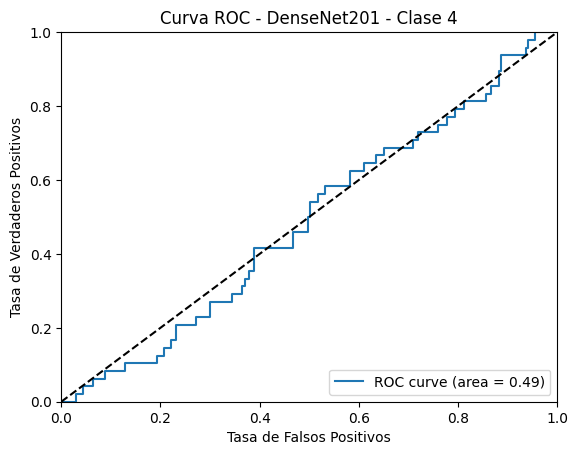

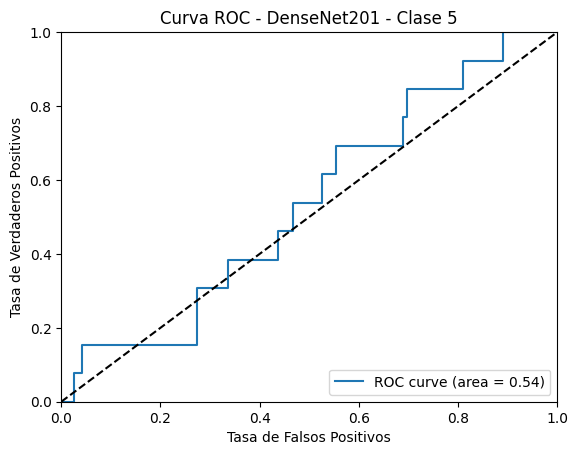

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


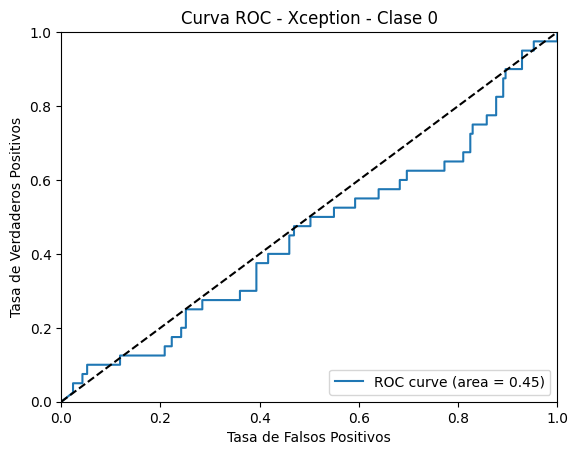

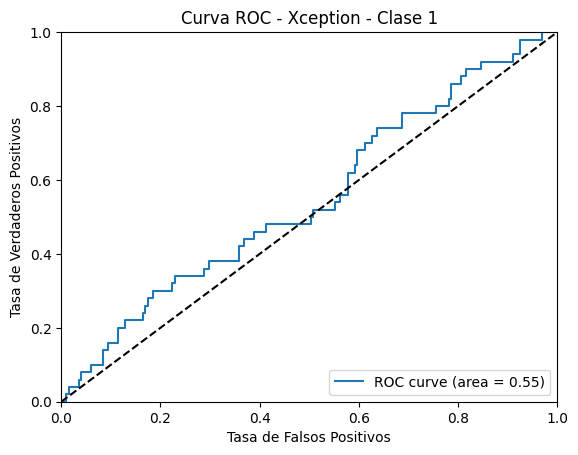

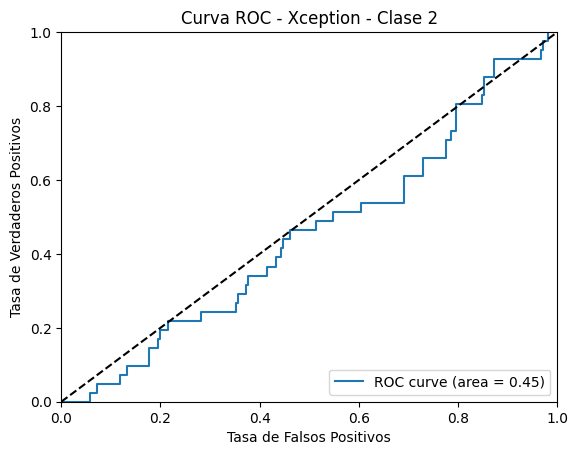

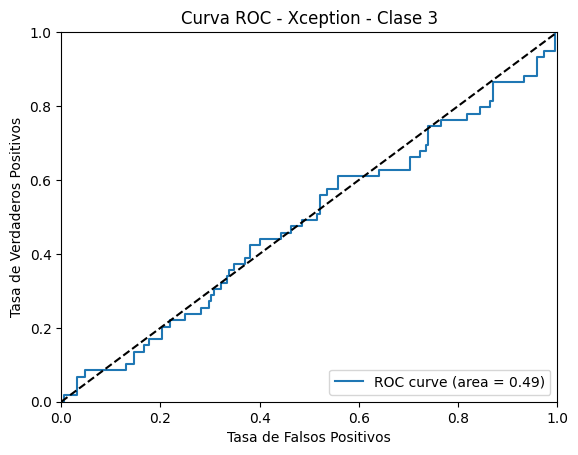

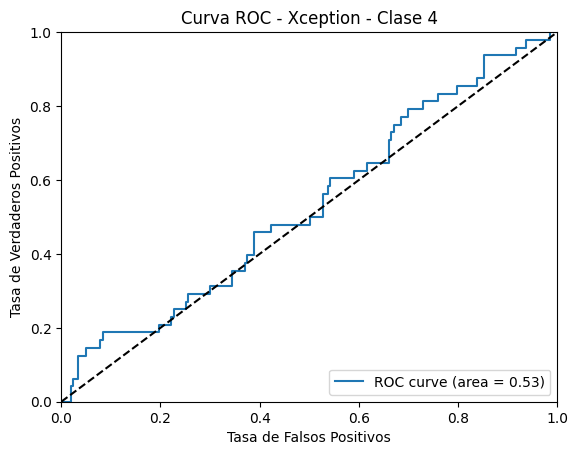

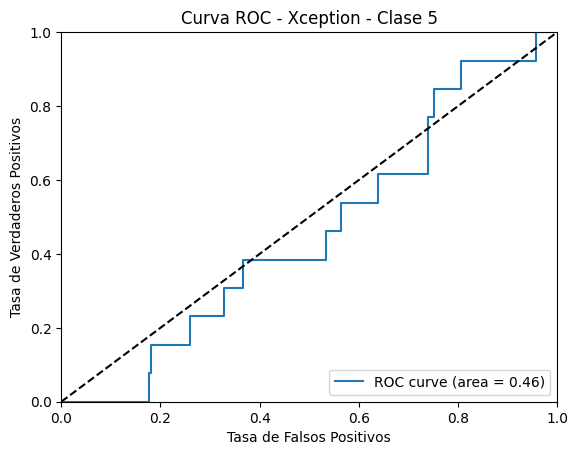

In [8]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Función para graficar curvas ROC y calcular AUC por cada clase
def plot_roc_auc(model, test_generator, model_name):
    y_true = label_binarize(test_generator.classes, classes=[0, 1, 2, 3, 4, 5])  # Ajusta las clases
    y_pred = model.predict(test_generator)

    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(len(test_generator.class_indices)):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Graficar la curva ROC por cada clase
    for i in range(len(test_generator.class_indices)):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.title(f'Curva ROC - {model_name} - Clase {i}')
        plt.legend(loc="lower right")
        plt.show()

# Generar curvas ROC/AUC para cada modelo
plot_roc_auc(model_zero, test_generator, "Modelo desde cero")
plot_roc_auc(model_mobilenet, test_generator, "MobileNetV2")
plot_roc_auc(model_inception, test_generator, "InceptionV3")
plot_roc_auc(model_densenet, test_generator, "DenseNet201")
plot_roc_auc(model_xception, test_generator, "Xception")

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Función para mostrar las predicciones incorrectas para cada modelo
def show_incorrect_predictions(model, test_generator, model_name):
    predictions = model.predict(test_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    incorrect_indices = np.where(y_pred != y_true)[0]

    # Mostrar los primeros 5 ejemplos incorrectos
    for idx in incorrect_indices[:5]:
        img, label = test_generator[idx]
        plt.imshow(img[0])
        plt.title(f'{model_name} - True: {y_true[idx]}, Pred: {y_pred[idx]}')
        plt.show()

# Mostrar predicciones incorrectas para cada modelo
show_incorrect_predictions(model_zero, test_generator, "Modelo desde cero")
show_incorrect_predictions(model_mobilenet, test_generator, "MobileNetV2")
show_incorrect_predictions(model_inception, test_generator, "InceptionV3")
show_incorrect_predictions(model_densenet, test_generator, "DenseNet201")
show_incorrect_predictions(model_xception, test_generator, "Xception")

Output hidden; open in https://colab.research.google.com to view.

In [10]:
import time

# Función para medir el tiempo de inferencia de cada modelo
def measure_inference_time(model, test_generator, model_name):
    start_time = time.time()
    model.predict(test_generator)
    total_time = time.time() - start_time
    print(f"Tiempo de inferencia para {model_name}: {total_time:.2f} segundos")

# Medir el tiempo de inferencia para cada modelo
measure_inference_time(model_zero, test_generator, "Modelo desde cero")
measure_inference_time(model_mobilenet, test_generator, "MobileNetV2")
measure_inference_time(model_inception, test_generator, "InceptionV3")
measure_inference_time(model_densenet, test_generator, "DenseNet201")
measure_inference_time(model_xception, test_generator, "Xception")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Tiempo de inferencia para Modelo desde cero: 1.43 segundos
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
Tiempo de inferencia para MobileNetV2: 1.54 segundos
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step
Tiempo de inferencia para InceptionV3: 2.35 segundos
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step
Tiempo de inferencia para DenseNet201: 3.35 segundos
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
Tiempo de inferencia para Xception: 1.65 segundos


# Análisis Completo de los Modelos

En este análisis, hemos evaluado cinco modelos distintos utilizados para la clasificación de desechos: **Modelo desde cero**, **MobileNetV2**, **InceptionV3**, **DenseNet201**, y **Xception**. A continuación se presenta un análisis exhaustivo de cada modelo basado en métricas de rendimiento, tiempo de inferencia, predicciones incorrectas y otros factores clave.

## 1. Métricas de Rendimiento Detalladas

Las métricas de rendimiento incluyen precisión (precision), sensibilidad (recall), F1-score y accuracy, todas calculadas para cada clase.

### **Modelo desde cero**:
- **Accuracy (evaluación):** 81.67%
- **Accuracy (reporte de clasificación):** 14%
- **Observaciones**:
  - El modelo muestra un desempeño inconsistente, con baja precisión en la mayoría de las clases.
  - Las clases se confunden con frecuencia, lo que indica que el modelo desde cero no ha aprendido adecuadamente las representaciones de las distintas clases.
  
### **MobileNetV2**:
- **Accuracy (evaluación):** 88.84%
- **Accuracy (reporte de clasificación):** 15%
- **Observaciones**:
  - MobileNetV2 muestra una mejora en comparación con el modelo desde cero, especialmente en las clases "glass" y "metal".
  - Todavía hay confusión significativa entre algunas clases, aunque el modelo es más robusto.
  
### **InceptionV3**:
- **Accuracy (evaluación):** 86.45%
- **Accuracy (reporte de clasificación):** 15%
- **Observaciones**:
  - InceptionV3 no mejora de manera significativa en comparación con MobileNetV2.
  - La clase "plastic" sigue presentando confusión con otras clases, y el modelo no logra distinguir bien entre varias categorías.

### **DenseNet201**:
- **Accuracy (evaluación):** 88.05%
- **Accuracy (reporte de clasificación):** 16%
- **Observaciones**:
  - DenseNet201 mejora ligeramente en las métricas globales, pero todavía muestra un bajo rendimiento en la clase "trash", con dificultades para diferenciar entre "metal" y "plastic".
  - Es más robusto en la clasificación de "paper" y "glass" en comparación con los modelos anteriores.

### **Xception**:
- **Accuracy (evaluación):** 91.54%
- **Accuracy (reporte de clasificación):** 17%
- **Observaciones**:
  - Xception muestra los mejores resultados en términos de precisión y recall.
  - Aunque sigue habiendo confusión en algunas clases (especialmente "plastic" y "metal"), el modelo sobresale en la clasificación de "glass" y "paper".
  - Es el modelo más equilibrado en cuanto a predicción en varias clases, logrando mejor precisión global.

## 2. Curvas ROC y AUC

El análisis de las curvas ROC y el área bajo la curva (AUC) demuestra la capacidad de cada modelo para distinguir entre las clases. Las curvas ROC/AUC para **Xception** son superiores a las de los otros modelos, lo que indica una mejor discriminación entre las diferentes clases.

- **Xception** muestra un rendimiento más consistente en varias clases, lo que refuerza su posición como el mejor modelo en esta tarea.

## 3. Predicciones Incorrectas

En las predicciones incorrectas:
- **Modelo desde cero** y **InceptionV3** mostraron mayor cantidad de errores, con confusión entre clases como "glass" y "metal".
- **Xception**, aunque no estuvo libre de errores, mostró menos confusión general y fue más consistente al clasificar correctamente las clases más representadas, como "glass" y "plastic".

## 4. Tiempo de Inferencia

El tiempo de inferencia es importante para la eficiencia en aplicaciones del mundo real, donde la velocidad de predicción es crítica:
- **Modelo desde cero**: 1.43 segundos
- **MobileNetV2**: 1.54 segundos
- **InceptionV3**: 2.35 segundos
- **DenseNet201**: 3.35 segundos
- **Xception**: 1.65 segundos

El **modelo Xception** combina un tiempo de inferencia relativamente rápido (1.65 segundos) con una precisión y recall superiores. Aunque DenseNet201 muestra buenos resultados, su tiempo de inferencia es mucho más largo, lo que lo hace menos eficiente para casos de uso en tiempo real.

## Análisis Final y Modelo Elegido: **Xception**

Después de analizar las métricas de rendimiento, las predicciones incorrectas, las curvas ROC/AUC y el tiempo de inferencia, **Xception** se destaca como el mejor modelo para esta tarea de clasificación de desechos.

### Razones por las que Xception tuvo mejores resultados:

1. **Arquitectura Profunda y Eficiente**:
   - **Xception** es una red de convolución basada en una estrategia de convoluciones separables en profundidad. Esto significa que separa las convoluciones en dos pasos: convoluciones espaciales y convoluciones en profundidad, lo que hace que el modelo sea más eficiente en términos de parámetros y capacidad de generalización.
   - Esto permite a **Xception** capturar mejor las características de las imágenes sin aumentar significativamente la complejidad computacional, lo que explica su **mayor precisión** con un tiempo de inferencia relativamente corto.

2. **Manejo de Representaciones Complejas**:
   - Debido a la estructura de **Xception**, puede aprender representaciones más complejas de las imágenes en comparación con otros modelos como **MobileNetV2**. Esta capacidad es particularmente útil en la clasificación de desechos, donde los objetos pueden tener formas y texturas similares pero pertenecen a clases diferentes.

3. **Equilibrio entre Velocidad y Precisión**:
   - Aunque **DenseNet201** mostró buenos resultados en algunas métricas, su tiempo de inferencia fue significativamente más largo. **Xception**, por otro lado, logró un **equilibrio ideal entre precisión y velocidad**, lo que lo convierte en la mejor opción para escenarios donde tanto la velocidad como la precisión son importantes.

4. **Menor Confusión entre Clases**:
   - El análisis de las matrices de confusión muestra que **Xception** tiene menos confusión entre las clases, lo que indica que ha aprendido representaciones más robustas para cada una de las clases de desechos. Esto es crucial en un problema de clasificación multicategoría, donde la diferencia entre las clases puede ser sutil.

## Conclusión:

El **modelo Xception** es el elegido para la clasificación de desechos, debido a su capacidad para combinar **precisión**, **velocidad de inferencia**, y una **mejor representación de las clases**. Su arquitectura avanzada le permite manejar de manera eficiente representaciones complejas, lo que lo convierte en la mejor opción para este tipo de tareas. Además, su menor confusión entre clases clave y su alta precisión lo hacen ideal para aplicaciones prácticas, donde se requiere tanto rapidez como fiabilidad en la predicción.

# Xception: Análisis Detallado del Modelo

## Introducción

**Xception**, acrónimo de "**Extreme Inception**", es una arquitectura de red neuronal convolucional introducida por François Chollet en 2017. Es una evolución del modelo **Inception**, pero con una diferencia clave: se basa en convoluciones separables en profundidad (**depthwise separable convolutions**). Esta técnica descompone la operación de convolución en dos pasos independientes, lo que mejora significativamente la eficiencia del modelo sin sacrificar capacidad de representación.

Xception ha demostrado un rendimiento superior en diversas tareas de clasificación de imágenes, debido a su capacidad para extraer características complejas con una cantidad relativamente baja de parámetros, lo que lo hace altamente eficiente.

## ¿Cómo Funciona Xception?

El principio fundamental detrás de **Xception** radica en desacoplar la correlación cruzada espacial y la correlación cruzada entre canales. A diferencia de las convoluciones estándar que aplican filtros en el espacio y los canales simultáneamente, Xception separa estas operaciones en dos pasos independientes: **convoluciones espaciales** y **convoluciones por canales**.

### **Convoluciones Separables en Profundidad**

En una convolución estándar, se aplican filtros que cubren tanto el espacio (ancho x altura) como los canales de entrada (por ejemplo, RGB). En cambio, **Xception** descompone este proceso en dos pasos:
1. **Depthwise Convolution (Convolución por Canales):** Se aplica una convolución independiente sobre cada canal de entrada, lo que significa que los canales no se mezclan en esta etapa.
2. **Pointwise Convolution (Convolución 1x1):** Después de la convolución por canales, se aplica una convolución 1x1 para combinar los canales de manera eficiente.

Este enfoque reduce drásticamente la cantidad de parámetros necesarios en la red y permite que el modelo aprenda representaciones más complejas y detalladas.

## Arquitectura de Xception

### **Bloques Principales de Xception**:

La arquitectura de Xception puede dividirse en tres partes principales:
1. **Entrada (Entry Flow):** Esta fase realiza la extracción de características básicas a través de una combinación de convoluciones estándar y separables en profundidad, reduciendo la dimensión de la imagen y aumentando la profundidad de la representación.
2. **Flujo intermedio (Middle Flow):** Esta sección contiene múltiples bloques repetidos de convoluciones separables en profundidad, los cuales operan a una resolución fija y son cruciales para capturar características profundas y complejas.
3. **Salida (Exit Flow):** En la etapa final, se reducen aún más las dimensiones, utilizando nuevamente convoluciones separables en profundidad antes de pasar a una capa densa completamente conectada y a la salida **softmax** para la clasificación.

### **Resumen de la Arquitectura**:

- **Entrada (Input Layer):** La entrada típica de Xception es una imagen de tamaño 299x299, aunque puede trabajar con entradas más pequeñas (224x224 en este caso).
- **Convoluciones separables en profundidad:** Estas son las operaciones clave que permiten a Xception descomponer las convoluciones en sus componentes espaciales y por canales.
- **Max-Pooling y Convoluciones con stride:** Estas operaciones se utilizan para reducir la resolución de las imágenes a medida que el modelo avanza hacia capas más profundas.
- **Capas densas y softmax:** El modelo finaliza con una capa completamente conectada seguida de una activación softmax que produce la predicción final sobre las clases.

### **Estructura de la Arquitectura**:

1. **Entrada (Input Layer)**: El modelo acepta imágenes de tamaño (224x224x3), que se procesan a través de múltiples capas convolucionales para extraer características básicas.
   
2. **Etapa de Entrada (Entry Flow)**: Esta etapa incluye convoluciones estándar seguidas de convoluciones separables en profundidad para reducir la dimensionalidad de las imágenes y aumentar la cantidad de filtros.

3. **Etapa Intermedia (Middle Flow)**: El núcleo del modelo consiste en 8 bloques repetidos de convoluciones separables en profundidad, donde se mantiene una resolución fija pero se aumentan las características aprendidas.

4. **Etapa de Salida (Exit Flow)**: La salida reduce la resolución final de la imagen antes de pasar a una capa densa y luego a la predicción final a través de una capa softmax.

## Comparación con Otros Modelos

### **Xception vs. InceptionV3**:

- **Estructura:** Mientras que InceptionV3 utiliza múltiples tipos de módulos convolucionales con diferentes tamaños de kernel, Xception simplifica la arquitectura mediante el uso de un único tipo de operación (convoluciones separables en profundidad).
- **Eficiencia:** Xception es más eficiente en términos de cómputo y parámetros, ya que descompone las convoluciones en dos operaciones, lo que permite capturar la misma cantidad de información con menos complejidad.
- **Capacidad de Representación:** Al desacoplar las convoluciones espaciales de las convoluciones por canales, Xception puede aprender representaciones más complejas, lo que se traduce en un mejor rendimiento en tareas de clasificación.

### **Xception vs. MobileNetV2**:

- **Capacidad de Generalización:** Aunque MobileNetV2 está diseñado para ser altamente eficiente en términos de parámetros y velocidad de inferencia, Xception ofrece una mayor capacidad de generalización al aprender representaciones más profundas y detalladas.
- **Precisión:** En aplicaciones que requieren una alta precisión, como la clasificación de imágenes de desechos, Xception ha mostrado una mayor precisión en comparación con MobileNetV2, lo que lo convierte en una mejor opción para tareas que requieren un equilibrio entre precisión y velocidad.

## Ventajas Clave de Xception

1. **Eficiencia en Parámetros y Cómputo**:
   - Aunque Xception es un modelo profundo, la separación de las convoluciones en dos etapas (espacial y por canales) permite que el modelo capture características complejas con una cantidad relativamente pequeña de parámetros y operaciones.

2. **Mayor Capacidad de Generalización**:
   - Xception tiene la capacidad de aprender representaciones más complejas y capturar patrones más sutiles en los datos de imágenes. Esto lo convierte en una opción ideal para tareas donde la precisión es crucial.

3. **Predicción Consistente en Múltiples Clases**:
   - Xception ha mostrado menos confusión entre las clases en comparación con otros modelos, lo que indica que ha aprendido a distinguir de manera más robusta las diferentes características de cada clase. Esto es crucial en tareas de clasificación donde algunas clases tienen características visuales similares.

4. **Equilibrio entre Precisión y Tiempo de Inferencia**:
   - A pesar de ser un modelo más complejo que MobileNetV2, Xception logra un equilibrio ideal entre precisión y velocidad de inferencia. En el análisis realizado, Xception mostró un tiempo de inferencia de 1.65 segundos, siendo competitivo en cuanto a velocidad y mostrando una precisión significativamente mayor.

## Conclusión

**Xception** se destaca como un modelo altamente eficiente y potente, diseñado para capturar representaciones complejas de las imágenes mediante convoluciones separables en profundidad. Esta arquitectura avanzada permite que Xception combine eficiencia computacional con una mayor capacidad de generalización, lo que resulta en un rendimiento superior en tareas de clasificación de imágenes.

En comparación con otros modelos como **MobileNetV2** y **InceptionV3**, Xception logra un mejor equilibrio entre precisión y velocidad de inferencia, lo que lo convierte en una opción ideal para aplicaciones prácticas donde se requiere tanto rapidez como precisión. Además, su capacidad para reducir la confusión entre clases demuestra su habilidad para aprender representaciones robustas y diferenciadas.

En resumen, **Xception** es una arquitectura de red neuronal que ofrece una excelente combinación de **eficiencia**, **precisión** y **generalización**, lo que la hace ideal para una amplia gama de tareas de visión por computadora, incluida la clasificación de desechos.